In [2]:
!pip install mysql-connector-python

   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.5 MB 2.9 MB/s eta 0:00:06
   ----- ---------------------------------- 2.4/16.5 MB 3.1 MB/s eta 0:00:05
   ------- -------------------------------- 3.1/16.5 MB 3.3 MB/s eta 0:00:05
   --------- ------------------------------ 3.9/16.5 MB 3.4 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/16.5 MB 3.0 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.5 MB 3.0 MB/s eta 0:00:04
   ------------ --------------------------- 5.2/16.5 MB 3.0 MB/s eta 0:00:04
   ------------- -------------------------- 5.5/16.5 MB 2.8 MB/s eta 0:00:04
   ------------- -------------------------- 5.8/16.5 MB 2.7 MB/s eta 0:00:05
   -------------- ------------------------- 6.0/16.5 MB 2.6 MB/s eta 0:00:05
   --------------- -

In [3]:
# LOAD DATA

import mysql.connector

# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",
    user="root",          # change if different
    password="Sridhar098#",
    database="db_e_commerce"
)

query = "SELECT * FROM customer_segmentation_data"

df = pd.read_sql(query, connection)

connection.close()

df.head()

C:\Users\SRIDHAR\AppData\Local\Temp\ipykernel_9188\1338711884.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,customer_id,register_to_order,first_to_last_order,total_unit,total_spent
0,C517907L,54,0,1.0,159500.0
1,C225180L,-61,0,1.0,59856.0
2,C708473L,-86,609,8.0,134560.0
3,C504900L,3,0,1.0,121800.0
4,C218108L,-150,0,1.0,98600.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [6]:
df.head(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent
0,C517907L,54,0,1.0,159500.0
1,C225180L,-61,0,1.0,59856.0
2,C708473L,-86,609,8.0,134560.0
3,C504900L,3,0,1.0,121800.0
4,C218108L,-150,0,1.0,98600.0


In [8]:
# Group Registered first
df_normal = df[df['register_to_order'] >= 0].copy()

# Group Pre-registration
df_pre_register = df[df['register_to_order'] < 0].copy()

print('Normal Customer :', df_normal.shape[0])
print('Pre-Register Customer :', df_pre_register.shape[0])


Normal Customer : 1983
Pre-Register Customer : 880


In [9]:
features = ['register_to_order',
            'first_to_last_order',
            'total_unit',
            'total_spent'          
]

In [10]:
# Standardization => limit the data range into mean = 0 and standard deviation = 1
# Normalization =>limit the data range between 0 and 1 

scaler_normal = StandardScaler()
X_normal_scaled = scaler_normal.fit_transform(df_normal[features])

scaler_pre = StandardScaler()
X_pre_scaled = scaler_pre.fit_transform(df_pre_register[features])



In [13]:
#  Train the model
kmeans = KMeans(n_clusters = 3, random_state = 42)
df_normal['cluster'] = kmeans.fit_predict(X_normal_scaled)

In [14]:
kmeans_pre = KMeans(n_clusters = 3, random_state = 42)
df_pre_register['cluster'] = kmeans_pre.fit_predict(X_pre_scaled)

C:\Users\SRIDHAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [19]:
#  Summary of the model 
cluster_summary = (
    df_normal.groupby('cluster')[features].mean().round(2)
)

cluster_summary


,register_to_order,first_to_last_order,total_unit,total_spent
cluster,,,,
0,230.54,3.17,1.61,496225.77
1,31.71,3.18,1.69,686137.28
2,53.92,227.08,15.64,5447076.09


In [20]:
cluster_summary = (
    df_pre_register.groupby('cluster')[features].mean().round(2)
)

cluster_summary

,register_to_order,first_to_last_order,total_unit,total_spent
cluster,,,,
0,-174.33,100.50,3.81,1627081.80
1,-32.11,14.06,1.62,685660.65
2,-125.22,510.11,53.11,53675268.67


In [21]:
#  Mapping ()
cluster_labels = {
    0: "Normal But Low Engagement",
    1: "Extreme High Volume",
    2: "Loyal, High-Value Customer"
}
df_normal["segment"] = df_normal["cluster"].map(cluster_labels)
df_normal.head(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent,cluster,segment
0,C517907L,54,0,1.0,159500.0,1,Extreme High Volume
3,C504900L,3,0,1.0,121800.0,1,Extreme High Volume
6,C702126L,0,0,1.0,219820.0,1,Extreme High Volume
7,C597119L,104,0,3.0,86826.0,1,Extreme High Volume
9,C479992L,7,434,3.0,7390360.0,2,"Loyal, High-Value Customer"


In [22]:
cluster_labels = {
    0: "Normal But Low Engagement",
    1: "Extreme High Volume",
    2: "Loyal, High-Value Customer"
}
df_pre_register["segment"] = df_pre_register["cluster"].map(cluster_labels)
df_pre_register.head(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent,cluster,segment
1,C225180L,-61,0,1.0,59856.0,1,Extreme High Volume
2,C708473L,-86,609,8.0,134560.0,0,Normal But Low Engagement
4,C218108L,-150,0,1.0,98600.0,0,Normal But Low Engagement
5,C875194L,-44,221,3.0,317028.0,1,Extreme High Volume
8,C800136L,-119,0,1.0,264480.0,1,Extreme High Volume


<Axes: xlabel='total_spent', ylabel='total_unit'>

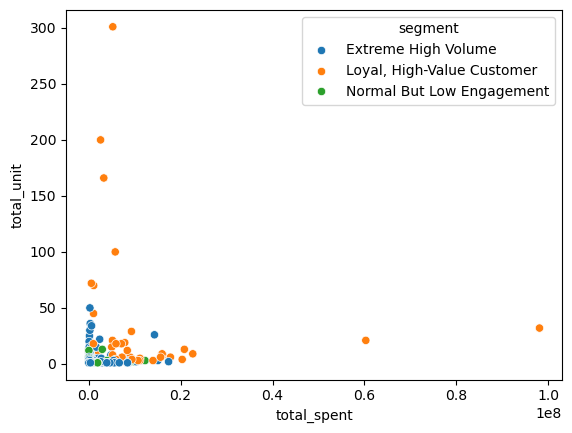

In [23]:
#  Visualize the Data

sns.scatterplot(
    data= df_normal,
    x= 'total_spent',
    y= 'total_unit',
    hue= 'segment',
    palette = 'tab10'
)

<Axes: xlabel='total_spent', ylabel='total_unit'>

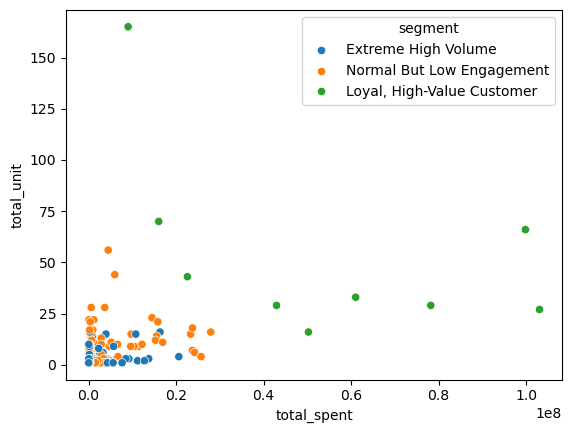

In [24]:

sns.scatterplot(
    data= df_pre_register,
    x= 'total_spent',
    y= 'total_unit',
    hue= 'segment',
    palette = 'tab10'
)

In [25]:
#  Combine the Data
df_normal['segment_type'] = 'normal'
df_pre_register['segment_type'] = 'pre_register'

In [27]:
df_segmented = pd.concat([df_normal, df_pre_register])

In [29]:
df_segmented.tail(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent,cluster,segment,segment_type
2843,C194207L,-231,0,1.0,156020.0,0,Normal But Low Engagement,pre_register
2844,C951342L,-130,0,3.0,125280.0,0,Normal But Low Engagement,pre_register
2846,C795421L,-21,0,1.0,145000.0,1,Extreme High Volume,pre_register
2858,C995465L,-2,0,3.0,60726.0,1,Extreme High Volume,pre_register
2862,C485098L,-55,0,1.0,33060.0,1,Extreme High Volume,pre_register


In [30]:
#  Save the data
df_segmented.to_excel("customer_segmentation_output.xlsx", index=False)